In [1]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense
max_features = 10000
maxlen = 500
batch_size = 32

In [2]:
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data( num_words=max_features)
#(input_train, y_train), (input_test, y_test) = imdb.load_data()
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [3]:
model = Sequential()
model.add(Embedding(max_features, 32)) #max_feature=10,000 so, 320,000
model.add(SimpleRNN(32))               #(32+32+1)*32=2080
model.add(Dense(1, activation='sigmoid'))#(32+1)*1=33
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
history = model.fit(input_train, y_train,epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 224ms/step - acc: 0.5741 - loss: 0.6720 - val_acc: 0.6974 - val_loss: 0.5768
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 237ms/step - acc: 0.7911 - loss: 0.4579 - val_acc: 0.7962 - val_loss: 0.4515
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 209ms/step - acc: 0.8604 - loss: 0.3330 - val_acc: 0.7506 - val_loss: 0.6289
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 216ms/step - acc: 0.8984 - loss: 0.2554 - val_acc: 0.8352 - val_loss: 0.3983
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 207ms/step - acc: 0.9298 - loss: 0.1902 - val_acc: 0.8408 - val_loss: 0.4254
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 210ms/step - acc: 0.9463 - loss: 0.1457 - val_acc: 0.8150 - val_loss: 0.4668
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 213ms/step - acc: 0.9596 - loss: 0.1171 - val_acc: 0.8124 - val_loss: 0.5935
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 202ms/step - acc: 0.9772 - loss: 0.0702 - val_acc: 0.8464 - val_loss: 0.5104
Epoch 9/10
157/157 ━━━━━━━━━━━━━

In [5]:
predicted_classes = model.predict(input_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step


In [6]:
import numpy as np
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [8]:
predicted_classes.shape, y_test.shape

((25000,), (25000,))

In [9]:
correct = np.where(predicted_classes==y_test)[0]
print ("Found %d correct labels" % len(correct))


Found 12500 correct labels


In [10]:
incorrect = np.where(predicted_classes!=y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))

Found 12500 incorrect labels


In [11]:
from sklearn.metrics import classification_report
num_classes=2
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.50      1.00      0.67     12500
     Class 1       0.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



C:\Windows\System32\tf_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Windows\System32\tf_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Windows\System32\tf_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


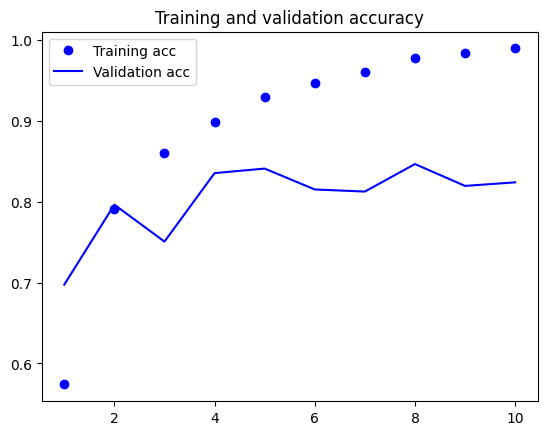

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()


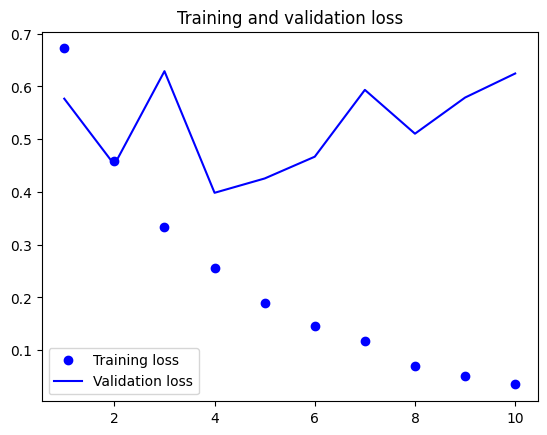

In [13]:

plt.figure()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()